In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import metrics

#### Load a model checkpoint for prediction (evaluation of data)

In [2]:
model = tf.keras.models.load_model('./downloaded_model/model_0904-015536_valAcc.hdf5')

2022-09-03 22:31:30.798769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load a test dataset

In [3]:
SIZE = 768
TEST_DIR_TS = './Pantex/processed'
val_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR_TS,
    shuffle=False,
    image_size=(SIZE,SIZE),
)

Found 43 files belonging to 2 classes.


#### Run our test dataset through the model

In [4]:
predictions = []
labels = []
for x, y in val_ds:
  predictions.append(np.argmax(model(x), axis=-1))
  labels.append(y.numpy())
predictions = np.concatenate(predictions, axis=0)
labels = np.concatenate(labels, axis=0)

#### Calculate our accuracy and generate a confusion matrix

Accuracy =  0.7906976744186046
tf.Tensor(
[[16  0]
 [ 9 18]], shape=(2, 2), dtype=int32)


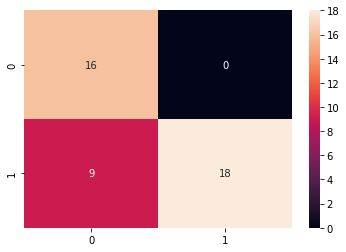

In [5]:
accuracy = metrics.accuracy_score(labels,predictions)
print ("Accuracy = ", accuracy)
cm = tf.math.confusion_matrix(labels,predictions)
print(cm)
heatmap =sns.heatmap(cm, annot=True)